## 이상치 처리

## box plot 해석

* 5가지 정보를 확인 할 수 있습니다. 
* 최솟값
* 제 1사분위수 - 25%
* 제 2사분위수(), 즉 중앙값
* 제 3 사분위수 -75%
* 최댓값
* 이상치(Outlier) 파악 가능합니다. 

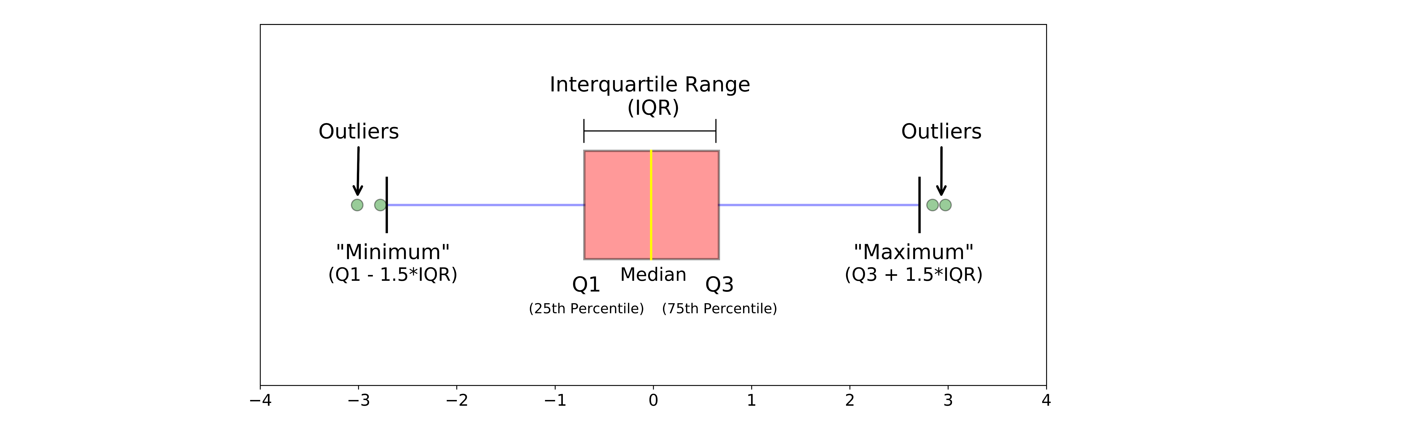

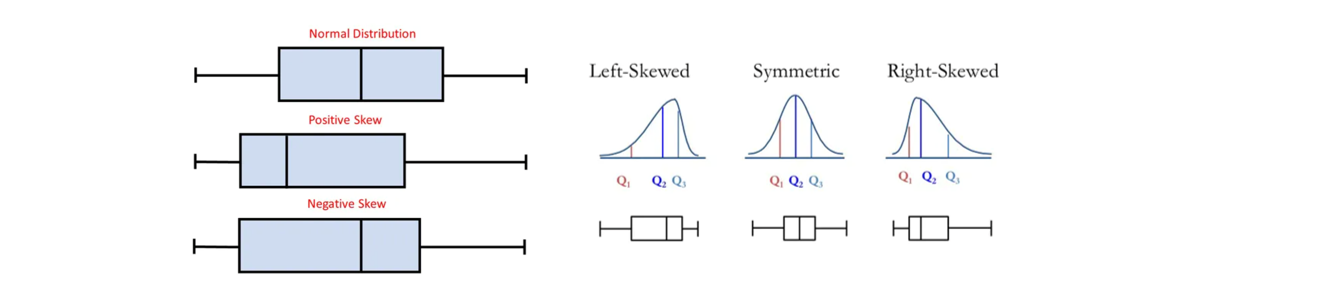

In [2]:
# 필요한 패키지 설치
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
df = pd.read_csv("./data/heart_2020_cleaned.csv")

# 데이터 샘플 확인
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
# BMI 컬럼의 분포 확인

df['BMI'].describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

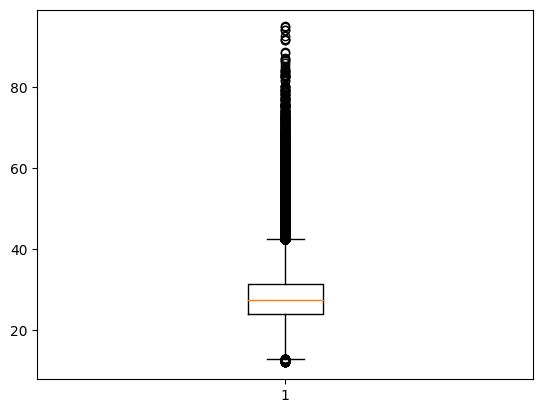

In [5]:
# BMI 컬럼의 박스플롯 시각화를 통한 이상치 확인

plt.boxplot(df['BMI'])
plt.show()

In [6]:
# BMI 컬럼의 이상치 제거 (IQR*3)

# Q!, Q3 범위 정의
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1    #IQR 범위. 
rev_range = 3  # 제거 범위 조절 변수 설정

# 이상치 범위 설정
filter = (df['BMI'] >= Q1 - rev_range * IQR) & (df['BMI'] <= Q3 + rev_range *IQR)
df_rmv = df.loc[filter]
print(df['BMI'].describe())
print(df_rmv['BMI'].describe())

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64
count    318477.000000
mean         28.193173
std           6.010014
min          12.020000
25%          24.020000
50%          27.320000
75%          31.320000
max          53.590000
Name: BMI, dtype: float64


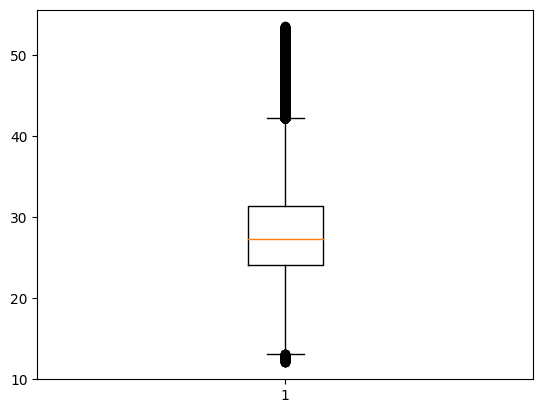

In [8]:
# 이상치 제거 후 박스플롯 시각화


plt.boxplot(df_rmv['BMI'])
plt.show()

## 연습문제

In [16]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

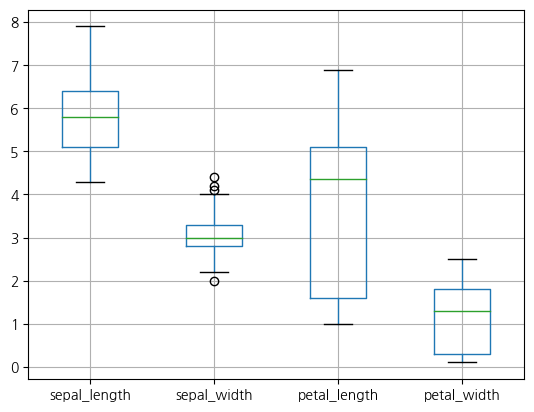

In [18]:
iris.boxplot()

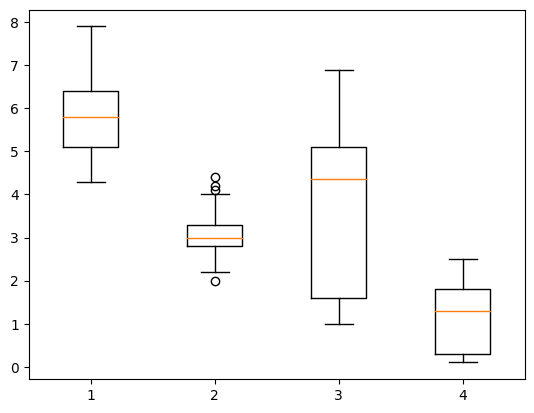

In [11]:
plt.boxplot(iris[['sepal_length','sepal_width','petal_length','petal_width']])
plt.show()

In [19]:
# Q!, Q3 범위 정의
Q1 = iris['sepal_width'].quantile(0.25)
Q3 = iris['sepal_width'].quantile(0.75)
IQR = Q3 - Q1    #IQR 범위. 
rev_range = 3  # 제거 범위 조절 변수 설정

# 이상치 범위 설정
filter = (iris['sepal_width'] >= Q1 - rev_range * IQR) & (iris['sepal_width'] <= Q3 + rev_range *IQR)
df_rmv = iris.loc[filter]


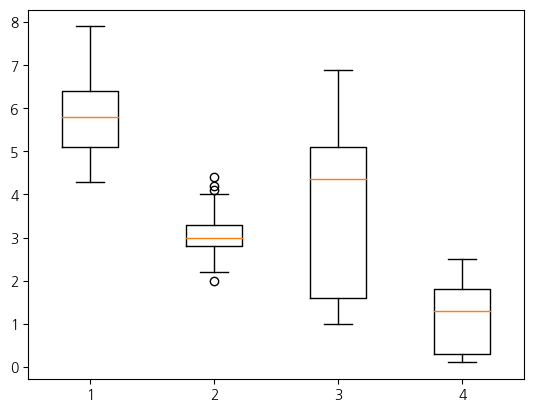

In [20]:
plt.boxplot(iris[['sepal_length','sepal_width','petal_length','petal_width']])
plt.show()

## 타이터닉 데이터에 대해 이상치를 제거 하시오.

In [21]:
titanic = sns.load_dataset('titanic')

In [22]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: >

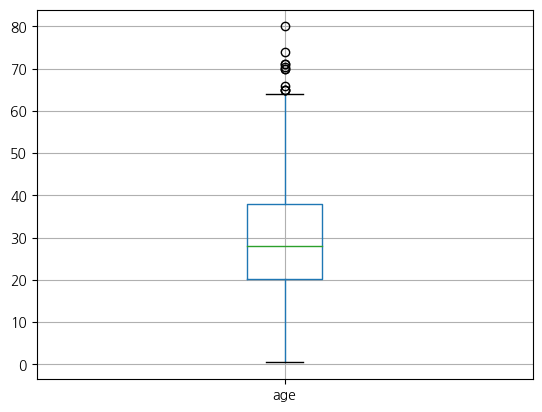

In [24]:
titanic[['age']].boxplot() # 이상치가 보이지만, 80세가 그리 잘못된 이상치가 아니므로 수용함.

<Axes: >

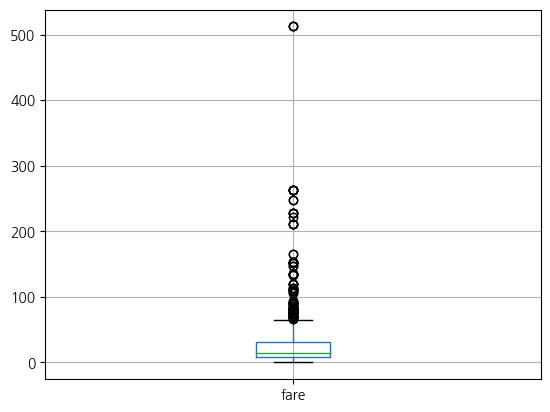

In [25]:
titanic[['fare']].boxplot()

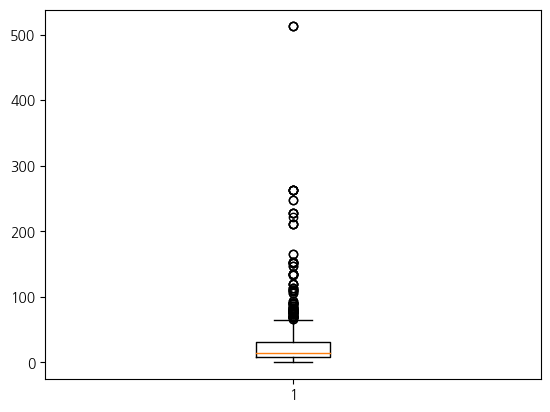

In [10]:
# 이상치 있는 피처 찾기

plt.boxplot(titanic['fare'])
plt.show()

<Axes: >

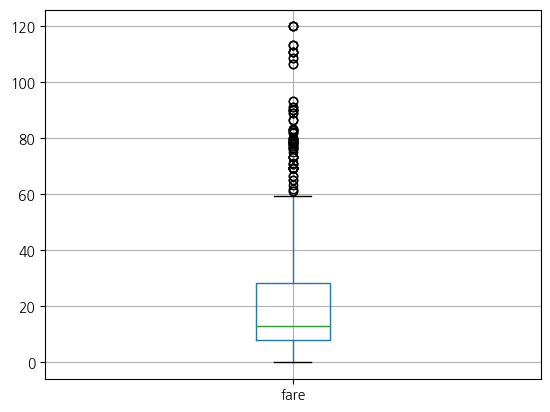

In [28]:
# 해당 피처에 대해 이상치 제거

# age 컬럼의 이상치 제거 (IQR*3)

# Q!, Q3 범위 정의
Q1 = titanic['fare'].quantile(0.25)
Q3 = titanic['fare'].quantile(0.75)
IQR = Q3 - Q1    #IQR 범위. 
rev_range = 4  # 제거 범위 조절 변수 설정

# 이상치 범위 설정
filter = (titanic['fare'] >= Q1 - rev_range * IQR) & (titanic['fare'] <= Q3 + rev_range *IQR)
df_rmv = titanic.loc[filter]

df_rmv[['fare']].boxplot()